## Vector de shakespeare

In [3]:
import numpy as np

%matplotlib inline

In [4]:
import numpy as np

from qubit_approximant import *
from qubit_approximant.benchmarking.functions import gaussian

x = np.linspace(-2.5, 2.5, 1000)
fn_kwargs = {"std": 0.5, "coef": 1}
fn = gaussian(x, **fn_kwargs)

circuit = CircuitRxRyRz(x, encoding="prob")
cost = Cost(fn, circuit, metric_str="mse")
opt = BlackBoxOptimizer(method="L-BFGS-B")
multilayer_opt = IncrementalOptimizer(2, 10, opt, new_layer_coef=0.3, new_layer_position="initial")


benchmark_seeds(
    num_seeds = 4,
    fn = gaussian,
    fn_kwargs = fn_kwargs,
    circuit = circuit,
    cost = cost,
    optimizer = multilayer_opt,
    filename = "prueba",
)

Comienzan los cálculos.
Cálculos terminados.


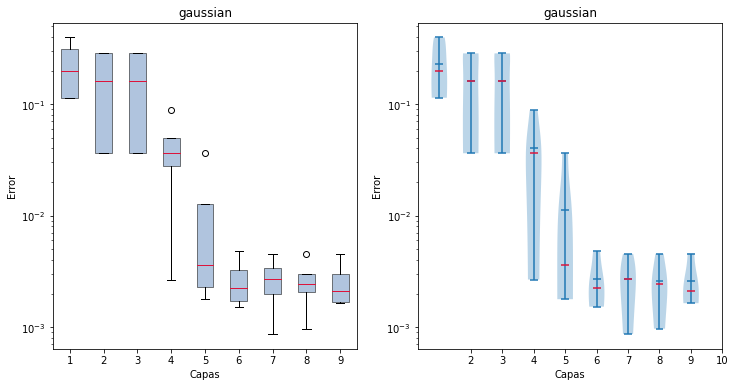

In [2]:
import matplotlib.pyplot as plt
import pickle

def box_plot_errores(layer_list, cost_array, function):
    # plot
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].boxplot(cost_array, meanline = True, patch_artist = True, medianprops={"color": "crimson", "linewidth": 1},
                boxprops={"facecolor": "lightsteelblue", "edgecolor": "black", "linewidth": 0.5})
    ''', positions=layer_list, widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "lightsteelblue", "edgecolor": "white", "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5})'''
    ax[0].set_title(function)
    ax[0].set_xlabel('Capas')
    ax[0].set_ylabel('Error')
    ax[0].set_yscale('log')

    violin = ax[1].violinplot(cost_array, showmeans=True, showmedians=True)
    ax[1].set_title(function)
    ax[1].set_xlabel('Capas')
    ax[1].set_xticks(layer_list)
    ax[1].set_ylabel('Error')
    ax[1].set_yscale('log')
    
    violin['cmedians'].set_color('crimson')

    plt.show()

with open("prueba" + ".pkl", "rb") as f:
    layer_list, l1_seeds, l2_seeds, inf_seeds, infidelity_seeds = pickle.load(f)

box_plot_errores(layer_list, l2_seeds, "gaussian")


In [1]:
import numpy as np
from qubit_approximant import *
from test_functions import gaussian

x = np.linspace(-2.5, 2.5, 1000)
fn = gaussian(x, std=0.5, coef=1)
min_layers = 2
max_layers = 10

params = 0.3 * np.random.randn(4 * min_layers)
model = CircuitRxRyRz(x, encoding="prob")
cost = Cost(fn, model, metric="mse")
opt = BlackBoxOptimizer(method="L-BFGS-B")
multilayer_opt = IncrementalOptimizer(min_layers, max_layers, opt, new_layer_coef=0.3, new_layer_position="initial")
params_list = multilayer_opt(cost, cost.grad, params)

l1_list, l2_list, inf_list, infidelity_list = metric_results(params_list,
    model = model,
    fn = gaussian,
    fn_kwargs = {"std": 0.5, "coef": 1})

In [5]:
l1_list, l2_list, inf_list, infidelity_list

([0.23300072356924165,
  0.06937574339897946,
  0.03262118673400199,
  0.008183094123011539,
  0.007965758523838086,
  0.008219960544688995,
  0.007880249365227484,
  0.00848896603388394,
  0.008028442499696408],
 [0.11414365783947483,
  0.03624988583233743,
  0.01753322441989032,
  0.004336990328876746,
  0.004255414133190905,
  0.004309661431415375,
  0.004220560345483538,
  0.004482580551254439,
  0.004268687230907291],
 [0.11598663260297114,
  0.04986369965298317,
  0.024231107189063048,
  0.007841795036586267,
  0.00838340967261302,
  0.00832349758128376,
  0.009229358269281817,
  0.00917283360152957,
  0.008914528946950285],
 [0.013453056140900421,
  0.0014827456447625842,
  0.0003449901721392923,
  2.0755141400097266e-05,
  2.033459639916302e-05,
  2.0793257384132957e-05,
  2.0055826831288925e-05,
  2.258223169260276e-05,
  2.0480347736162585e-05])

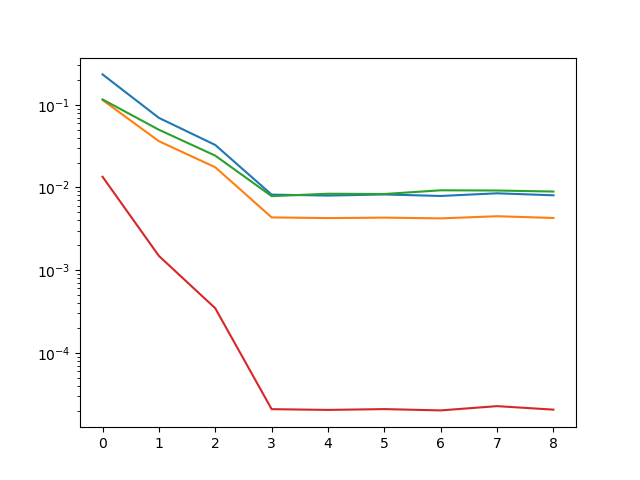

In [7]:
import matplotlib.pyplot as plt
%matplotlib widget

plt.plot(l1_list)
plt.plot(l2_list)
plt.plot(inf_list)
plt.plot(infidelity_list)

plt.yscale('log')

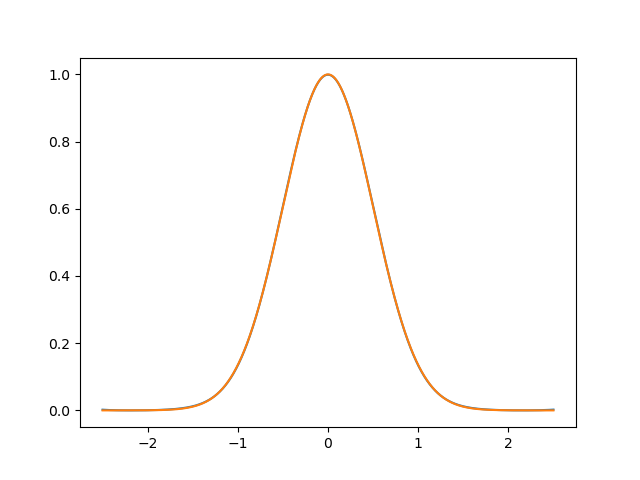

In [9]:
import matplotlib.pyplot as plt

%matplotlib widget

plt.plot(x, model(params_list[8]))
plt.plot(x, fn)

In [1]:
import numpy as np
np.array([[1], [2], [3]]).reshape(-1)

array([1, 2, 3])

In [3]:
df = pd.read_csv('OneHot_Encoding.csv')
onehot_vector = df['Word_Count'].to_numpy(dtype=np.float)[:2**11]  # usaremos 11 qubits i.e 2048 palabras
# onehot_vector = onehot_vector / np.sqrt(np.sum(onehot_vector**2))
onehot_vector = onehot_vector / onehot_vector[0]

C:\Users\pablovegan98\AppData\Local\Temp\ipykernel_9192\597400877.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onehot_vector = df['Word_Count'].to_numpy(dtype=np.float)[:2**11]  # usaremos 11 qubits i.e 2048 palabras


Parámetros iniciales:  [-0.12502735 -0.01688005 -0.64085883  0.49208124 -0.53803068 -0.25252421
  0.15086443 -0.37358643]


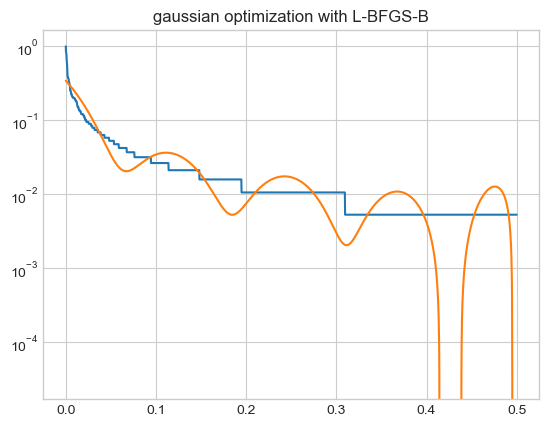

Parámetros finales:  [ -3.93788191  -0.06948091  21.65787307   4.70909489  16.93180653
 -24.19076194  -6.20368351  -0.65539338  -0.32564915  -0.47770424
   0.27087793   1.90317146   2.22300959  -1.46020843   0.07745459
   0.06806668  -2.96074007  -0.33039505  -0.18374604  -2.00285293
   0.96225069   1.20050528  -0.12599387   3.15513491  -2.15332967
  -0.74470545  -3.19960627   0.75835563]


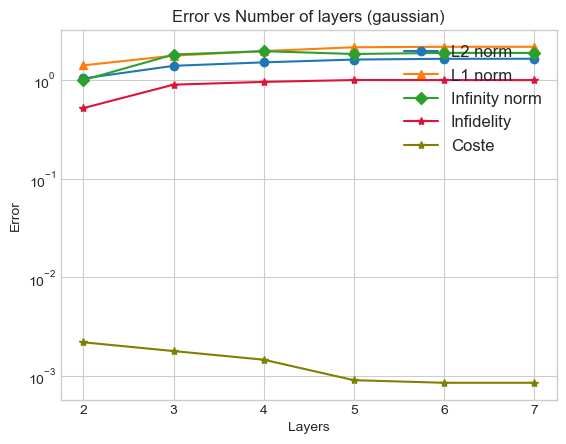

([1.0357132966260223,
  1.3903615025656233,
  1.50770234916719,
  1.6084443530360397,
  1.637802335402126,
  1.6385764651401737],
 [1.4060218262975688,
  1.7620172524463498,
  1.9612344615908897,
  2.1439077251485483,
  2.1661455804444207,
  2.167163135536591],
 [0.9969687533892666,
  1.807906879947156,
  1.9567715149881044,
  1.8311050609704647,
  1.8808381664052427,
  1.8781120260565816],
 [0.5187033901826262,
  0.8962360563024337,
  0.9559680308074883,
  0.9984941409796673,
  0.997501986413409,
  0.9973896969997657],
 array([0.00220695, 0.00179945, 0.00147128, 0.00091238, 0.00085887,
        0.00085885]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 2)

In [6]:
from main_1D import *

x = np.linspace(0, 0.5, 2048)

graficas_errores(seed = 2,
                min_layers = 2,
                max_layers = 7,
                x = x,
                f = onehot_vector,
                incremental_opt = True,
                opt_method='L-BFGS-B',
                cost_fun='normal',
                print_params=True,
                probability=False)

In [7]:
def split(φ):
    layers = φ.size // 4
    return φ[0:layers], φ[layers:].reshape(3, layers)

φ = np.array([-3.31813329e-01, -1.33895106e+00, -5.15647841e+00, -9.74019324e+00,
 -6.10500357e+00, -5.60225711e-01 , 9.21658439e+00 ,-7.35763722e+00,
 -8.60503665e-01,  3.67098706e+00 , 2.28525104e-01 ,-1.33309755e+00,
  5.44568399e-03,  1.31227228e+00, -2.57254275e+00, -1.97546718e-01,
 -7.57873633e-01, -1.37073264e+00 ,-9.53994612e-01,  4.95348270e+00,
  4.51879093e-03, -2.20454360e-01,  1.80882419e-01, -6.55464044e-02,
 -9.40797292e-01,  4.57643920e-01,  3.27785692e+00, -2.39215653e+00,
  3.99179238e-01, -1.25712089e-02,  6.98167502e-02, -2.40368119e+00,
  2.81597216e+00, -4.95394756e-01 , 1.17649827e+00, -1.19183700e+00,
  4.40438353e+00 , 1.06672798e+00, -6.97143556e-01, -1.87003945e+00])

w, θ = split(φ)

approx_vector = evalua_modelo(x, θ, w, probability=False)
np.sum(np.abs(approx_vector - onehot_vector)**2)

12.077118668367097

## Distribución de zipf

In [5]:
from main_1D import *
from scipy.special import zeta  


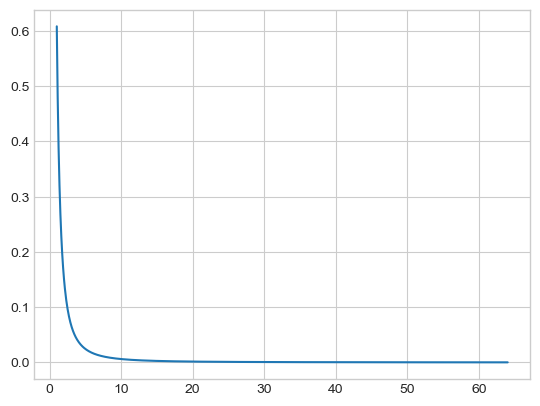

In [6]:
a = np.linspace(1,64,1000)
z = (a**-2)/zeta(2)
plt.plot(a, z)

In [7]:
k = np.linspace(1,5,1000)
zipf = (k**-4)/zeta(4)

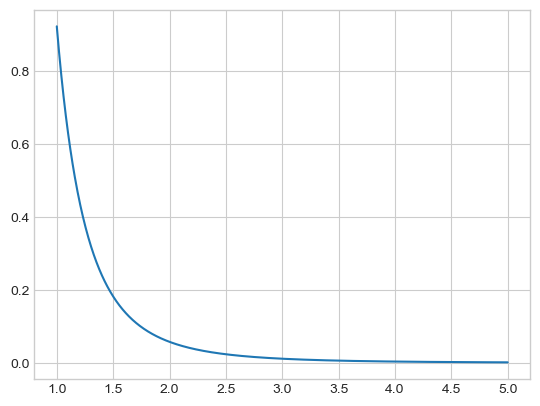

In [8]:
plt.plot(k, zipf)

In [9]:
graficas_errores(seed = 2,
                min_layers = 2,
                max_layers = 10,
                x = k,
                f = zipf,
                incremental_opt = True)

KeyboardInterrupt: 